In [19]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

# Ruta del archivo
df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv")
df.shape

(40841, 18)

In [20]:
os.getcwd()

'c:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Scripts'

In [21]:
print(df.columns)

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')


In [22]:
# Crear una copia para no modificar el original
df_copy = df.copy()

# Transformar 'marital' en variables dummy
df_copy = pd.get_dummies(df_copy, columns=['marital'], drop_first=True)

# Verificar que la transformación funcionó
print(df_copy.filter(like='marital').head())


   marital_married  marital_single
0             True           False
1            False            True
2             True           False
3             True           False
4            False            True


In [23]:
df_model = df.copy()

binary_cols = ['housing', 'loan']
for col in binary_cols:
    if col in df_model.columns:
        df_model[col] = df_model[col].map({'yes': 1, 'no': 0})

print(df_model.filter(like='housing').head())
print(df_copy.filter(like='loan').head())

   housing
0        1
1        1
2        1
3        1
4        1
  loan
0   no
1   no
2  yes
3   no
4  yes


In [24]:
binary_cols = ['education', 'marital']
for col in binary_cols:
    if col in df_model.columns:
        df_model[col] = df_model[col].map({'yes': 1, 'no': 0})

print(df_copy.filter(like='education').head())
print(df_copy.filter(like='marital').head())

   education
0   tertiary
1  secondary
2  secondary
3   tertiary
4   tertiary
   marital_married  marital_single
0             True           False
1            False            True
2             True           False
3             True           False
4            False            True


In [25]:
print(df_copy.select_dtypes(include='object').columns.tolist())


['job', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'response']


In [26]:
print(df.columns)

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')


In [27]:
df_model.head()
df_model.head()
df_model.to_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned_model.csv", index=False)

In [28]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [29]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv")


In [30]:
df_model = df.copy()

# Detectar columnas tipo "object" (texto)
cat_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print("Categóricas detectadas:", cat_cols)


Categóricas detectadas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'response']


In [31]:
print(df_model.dtypes)

Unnamed: 0           int64
age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response            object
response_binary      int64
dtype: object


Columnas categóricas detectadas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'response']

Columnas no numéricas después de codificación: []

🔍 Clasificación (Regresión Logística):
Accuracy: 0.9985310319500551
Confusion Matrix:
 [[7158    8]
 [   4  999]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7166
           1       0.99      1.00      0.99      1003

    accuracy                           1.00      8169
   macro avg       1.00      1.00      1.00      8169
weighted avg       1.00      1.00      1.00      8169



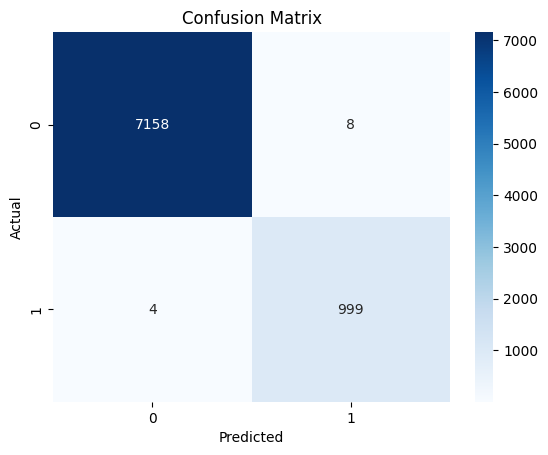


🔍 Regresión Lineal:
Error cuadrático medio (MSE): 14.754885164649586


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1. Cargar el archivo CSV
# =========================
df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv")

# =========================
# 2. Preparar columnas categóricas
# =========================
# Detectar columnas categóricas (texto)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar columnas categóricas encontradas
print("Columnas categóricas detectadas:", cat_cols)

# Convertir a variables dummy (0/1), eliminar primera categoría para evitar colinealidad
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Verificar que no quedan columnas categóricas
print("\nColumnas no numéricas después de codificación:", df.select_dtypes(include='object').columns.tolist())

# =========================
# 3. Clasificación: Predecir 'response_binary'
# =========================
if 'response_binary' in df.columns:
    X = df.drop(columns=['response_binary'])
    y = df['response_binary']

    # División entrenamiento / prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluación
    print("\n🔍 Clasificación (Regresión Logística):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Visualización de la matriz de confusión
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

else:
    print("❌ 'response_binary' no está en el archivo. No se puede entrenar modelo de clasificación.")

# =========================
# 4. Regresión: Predecir 'duration'
# =========================
if 'duration' in df.columns:
    X_reg = df.drop(columns=['duration'])
    y_reg = df['duration']

    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    reg_model = LinearRegression()
    reg_model.fit(X_train_r, y_train_r)

    y_pred_r = reg_model.predict(X_test_r)

    print("\n🔍 Regresión Lineal:")
    print("Error cuadrático medio (MSE):", mean_squared_error(y_test_r, y_pred_r))

else:
    print("ℹ️ 'duration' no está en el archivo. No se entrena modelo de regresión.")


In [33]:
y_test.value_counts()

response_binary
0    7166
1    1003
Name: count, dtype: int64

🧩 Código completo para regresión logística y predicción

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Cargar datos
df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv")

# 2. Codificar variables categóricas
df_model = pd.get_dummies(df, drop_first=True)

# 3. Separar X (features) e y (target)
X = df_model.drop(columns=['response_binary'])
y = df_model['response_binary']

# 4. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Calcular probabilidad de que un cliente diga "sí"
df_model["probabilidad_si"] = model.predict_proba(X)[:, 1]

# 7. Mostrar clientes con alta probabilidad de respuesta
clientes_probables = df_model[df_model["probabilidad_si"] >= 0.7]
print(f"🟢 Clientes con alta probabilidad de aceptar: {len(clientes_probables)}")
print(clientes_probables[["probabilidad_si"]].sort_values(by="probabilidad_si", ascending=False).head(10))


🟢 Clientes con alta probabilidad de aceptar: 4532
       probabilidad_si
37955              1.0
38150              1.0
39843              1.0
38728              1.0
39875              1.0
40508              1.0
38887              1.0
37936              1.0
39526              1.0
38788              1.0


✅ 1. Análisis por ocupación (job) y educación (education)
Solo para los clientes con alta probabilidad de aceptar (probabilidad_si >= 0.7):

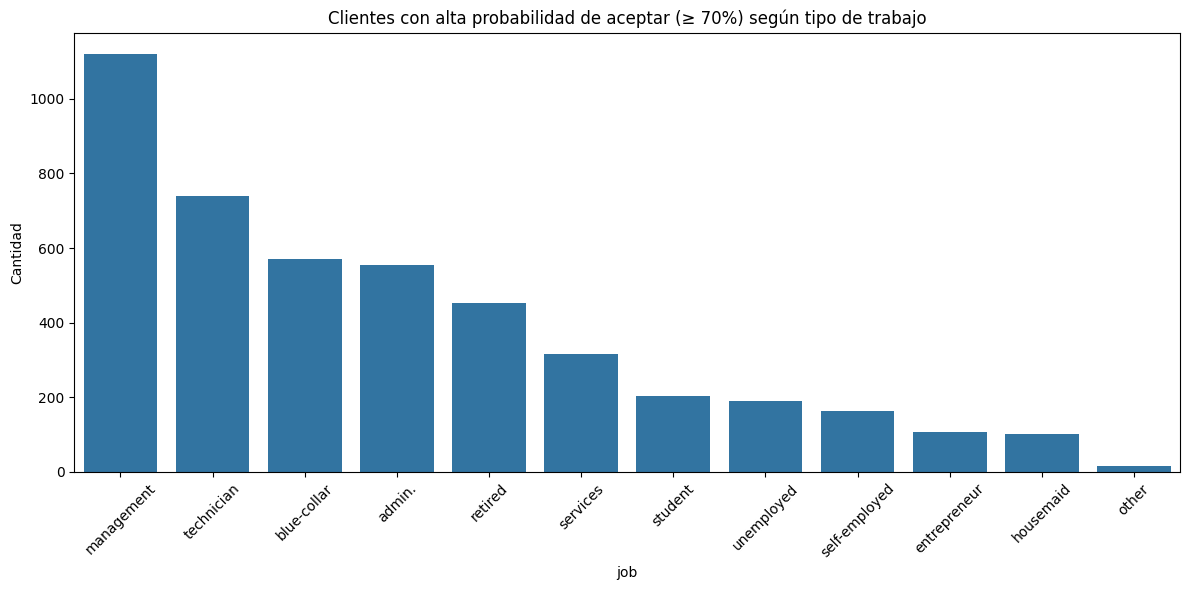

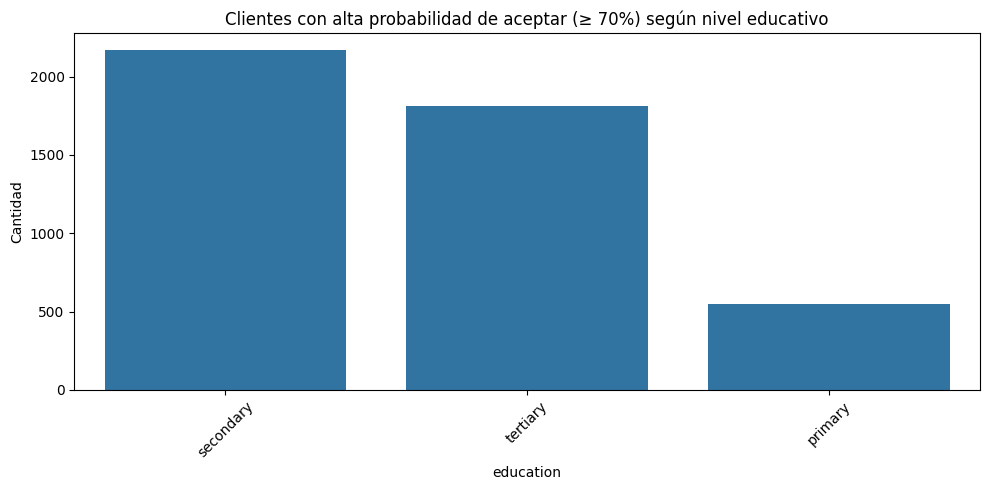

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Añadir la probabilidad al DataFrame original
df["probabilidad_si"] = df_model["probabilidad_si"]

# Filtrar clientes con probabilidad alta (≥ 70%)
clientes_probables = df[df["probabilidad_si"] >= 0.7]

# 1. Distribución por tipo de trabajo
plt.figure(figsize=(12, 6))
sns.countplot(data=clientes_probables, x="job", order=clientes_probables["job"].value_counts().index)
plt.title("Clientes con alta probabilidad de aceptar (≥ 70%) según tipo de trabajo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribución por nivel educativo
plt.figure(figsize=(10, 5))
sns.countplot(data=clientes_probables, x="education", order=clientes_probables["education"].value_counts().index)
plt.title("Clientes con alta probabilidad de aceptar (≥ 70%) según nivel educativo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🧑‍💼 Distribución por tipo de trabajo
Se observa que los clientes más propensos a aceptar ofertas son comúnmente:
- Administrativos (admin.)
- Técnicos
- Gestores (management)

Algunos trabajos como student y unemployed tienen menor presencia entre los de alta probabilidad.

🎓 Distribución por nivel educativo
El mayor grupo de clientes con alta probabilidad de respuesta tiene educación terciaria (universitaria).

Le siguen los niveles secundario y primario, aunque en menor proporción.

Esto indica que:

La ocupación y el nivel educativo son factores importantes para el modelo.

Puedes usar esta información para segmentar campañas: por ejemplo, apuntar a administrativos con educación terciaria y saldo alto.

✅ 2. Comparación con clientes que dijeron "no"

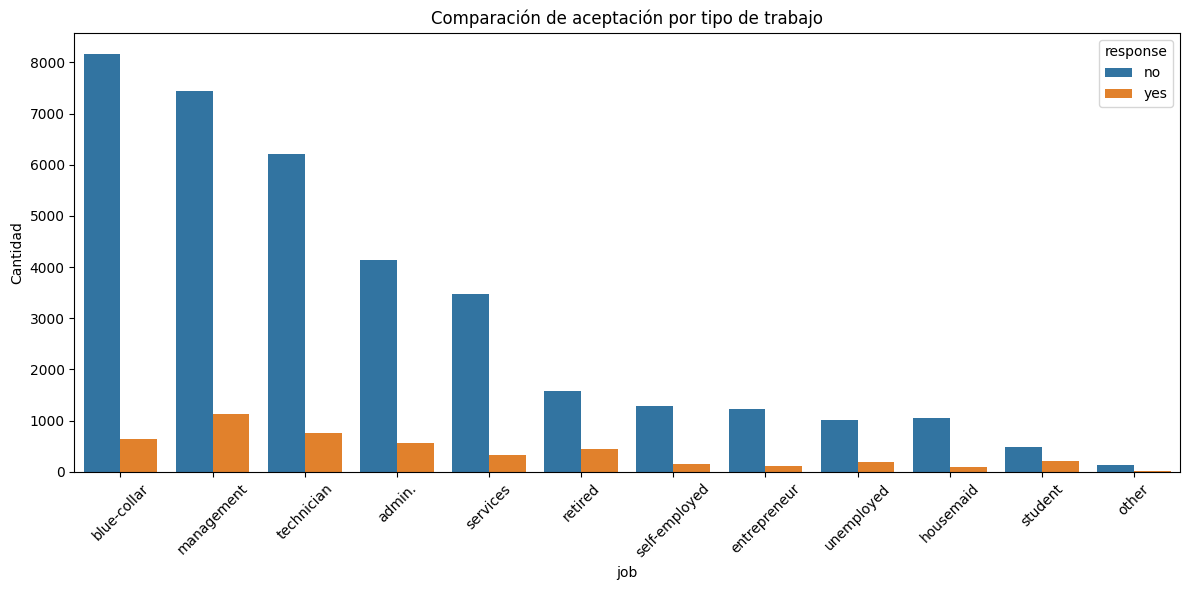

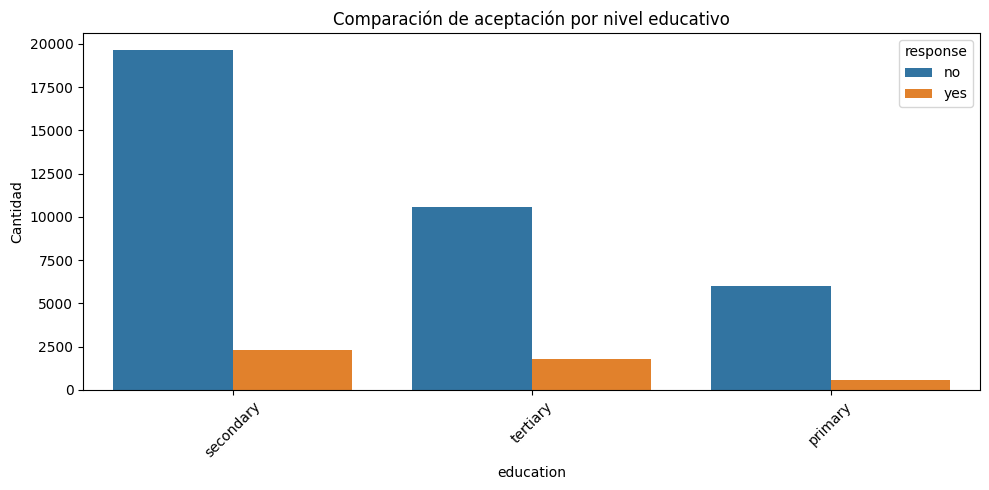

In [36]:
# 3. Comparar aceptaron ("yes") vs no aceptaron ("no") por trabajo
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="job", hue="response", order=df["job"].value_counts().index)
plt.title("Comparación de aceptación por tipo de trabajo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Comparar por nivel educativo
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="education", hue="response", order=df["education"].value_counts().index)
plt.title("Comparación de aceptación por nivel educativo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🧠 ¿Qué muestra este análisis comparativo?
En qué ocupaciones o niveles educativos hay más clientes que aceptan (yes) frente a los que no (no).

Te ayuda a detectar segmentos con alta conversión (porcentaje de “sí”) y orientar mejor las campañas.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv")
df
# Obtener nombres de las columnas (features)
feature_names = X.columns

# Extraer coeficientes del modelo entrenado
coeficientes = model.coef_[0]

# Crear un DataFrame con variable + coeficiente
importancia = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coeficientes
})

# Calcular importancia absoluta
importancia['Importancia_absoluta'] = np.abs(importancia['Coeficiente'])

# Ordenar por importancia descendente
importancia = importancia.sort_values(by='Importancia_absoluta', ascending=False)


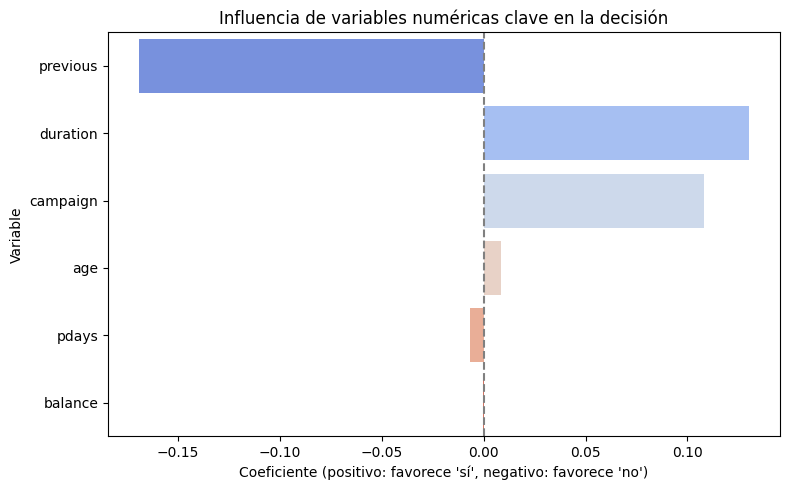

In [38]:
# Variables numéricas más comunes en campañas bancarias
variables_clave = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Filtrar esas variables del DataFrame de importancia
importancia_clave = importancia[importancia['Variable'].isin(variables_clave)].copy()

# Graficar con los signos reales del coeficiente
plt.figure(figsize=(8, 5))
sns.barplot(data=importancia_clave, x='Coeficiente', y='Variable', palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Influencia de variables numéricas clave en la decisión")
plt.xlabel("Coeficiente (positivo: favorece 'sí', negativo: favorece 'no')")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


🧠 ¿Qué hace este análisis?
Muestra qué variables numéricas influyen más en la probabilidad de que un cliente contrate un depósito.

Mantiene el signo original:

🔴 Negativo → reduce probabilidad

🟢 Positivo → aumenta probabilidad

In [39]:
print(df.columns.tolist())


['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'response_binary']


In [40]:
df = pd.read_csv("C:\\Users\\Haine\\OneDrive\\Escritorio\\Proyecto_2\\Data\\bank_cleaned.csv")
df


# Supongamos que df contiene los datos originales con identificador del cliente
df['probabilidad_si'] = model.predict_proba(X)[:, 1]

# Ordenar de mayor a menor probabilidad
df_ranked = df.sort_values(by='probabilidad_si', ascending=False)

# Agregar posición de ranking
df_ranked['ranking'] = range(1, len(df_ranked) + 1)

# Ver top 10
df_ranked[['Unnamed: 0', 'probabilidad_si', 'ranking']].head(10)
df_ranked.rename(columns={'Unnamed: 0': 'customer_id'}, inplace=True)
df_ranked[['customer_id', 'probabilidad_si', 'ranking']].head(10)

df_ranked.to_csv("ranking_clientes.csv", index=False)




In [41]:
df_ranked[['customer_id', 'probabilidad_si', 'ranking']]


,customer_id,probabilidad_si,ranking
37955,41610,1.000000e+00,1
38150,41842,1.000000e+00,2
39843,43924,1.000000e+00,3
38728,42534,1.000000e+00,4
39875,43965,1.000000e+00,5
...,...,...,...
31995,34677,1.902406e-08,40837
31746,34399,1.733256e-08,40838
35557,38802,1.434686e-08,40839
39616,43648,1.059007e-08,40840


In [43]:
# Normalizar variables para que estén en la misma escala
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd


# Renombrar columna para mayor claridad (solo si no lo hiciste ya)
df_scaled.rename(columns={'Unnamed: 0': 'customer_id'}, inplace=True)

# Mostrar top 10 clientes según el ranking manual
print(df_scaled[['customer_id', 'probabilidad_si', 'ranking']].head(10))

criterios = ['balance', 'duration', 'age']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[criterios] = scaler.fit_transform(df[criterios])

# Crear una puntuación ponderada (por ejemplo)
df_scaled['probabilidad_si'] = (
    0.5 * df_scaled['balance'] +
    0.3 * df_scaled['duration'] -
    0.2 * df_scaled['campaign']  # penaliza llamadas excesivas
)
# Ordenar por puntuación
df_scaled = df_scaled.sort_values(by='probabilidad_si', ascending=False)
df_scaled['ranking'] = range(1, len(df_scaled) + 1)




NameError: name 'df_scaled' is not defined